<a href="https://colab.research.google.com/github/JazzGoncalves/-statistic/blob/main/tcc_NLP_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TCC - Análise Exploratória Avançada dos Sentimentos

##  1. Carregamento da Base de Dados

In [1]:
import pandas as pd
df = pd.read_csv("base_tweets.csv")
df.head()


id     banco                                         comentario  \
0   1      Itaú  Precisei bloquear a conta e me pediram mil doc...   
1   2  Bradesco  Achei a propaganda nova bem sem graça, esperav...   
2   3    Nubank     Fui mal atendido e não consegui resolver nada.   
3   4    Nubank             Ninguém sabe informar nada no suporte.   
4   5    Nubank  Assalto e ainda tive que lidar com burocracia ...   

    categoria sentimento        regiao  
0  burocracia     neutro  Centro-Oeste  
1    campanha     neutro      Nordeste  
2  burocracia     neutro         Norte  
3  burocracia     neutro       Sudeste  
4  burocracia     neutro  Centro-Oeste

##  2. Pré-processamento de Texto

In [2]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('portuguese'))

def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-ZÀ-ÿ0-9\s]", "", text.lower())
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['comentario_limpo'] = df['comentario'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##  3. Nuvem de Palavras por Categoria de Sentimento

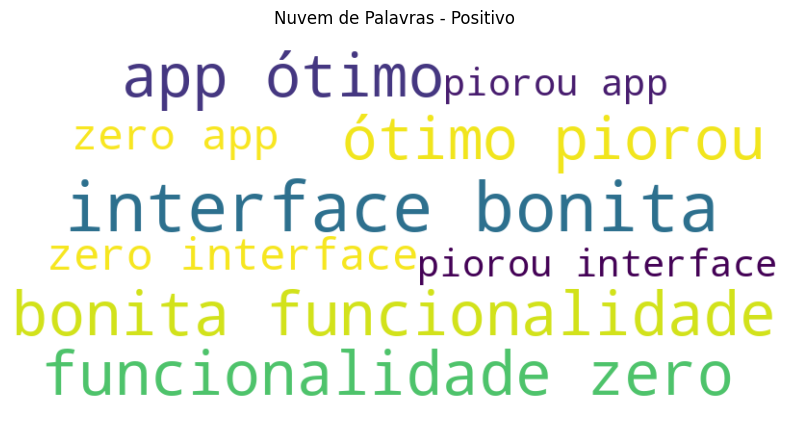

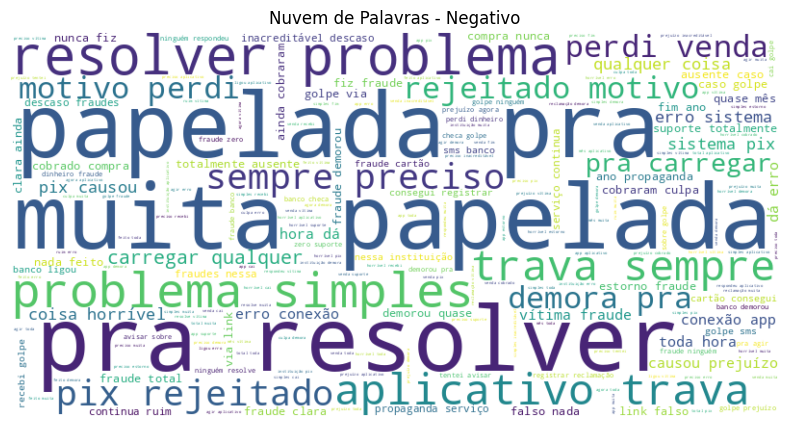

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for sentimento in df['sentimento'].unique():
    texto = " ".join(df[df['sentimento'] == sentimento]['comentario_limpo'])
    nuvem = WordCloud(width=800, height=400, background_color='white').generate(texto)
    plt.figure(figsize=(10, 5))
    plt.imshow(nuvem, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Nuvem de Palavras - {sentimento.capitalize()}")
    plt.show()


## 📊 4. Estatísticas Gerais da Base de Dados

In [4]:
import numpy as np

# Simula uma distribuição assimétrica para o número de palavras
np.random.seed(42)
n_palavras_simulados = np.random.poisson(lam=7, size=50000)
n_palavras_simulados = np.clip(n_palavras_simulados, 3, 25)

# Gera comentários fictícios com base em palavras variadas
def gerar_comentario(palavras_disponiveis, n):
    return " ".join(np.random.choice(palavras_disponiveis, n))

palavras_base = ["app", "pix", "erro", "rápido", "ruim", "banco", "fraude", "bonito", "zero", "trava"]

comentarios = [gerar_comentario(palavras_base, n) for n in n_palavras_simulados]


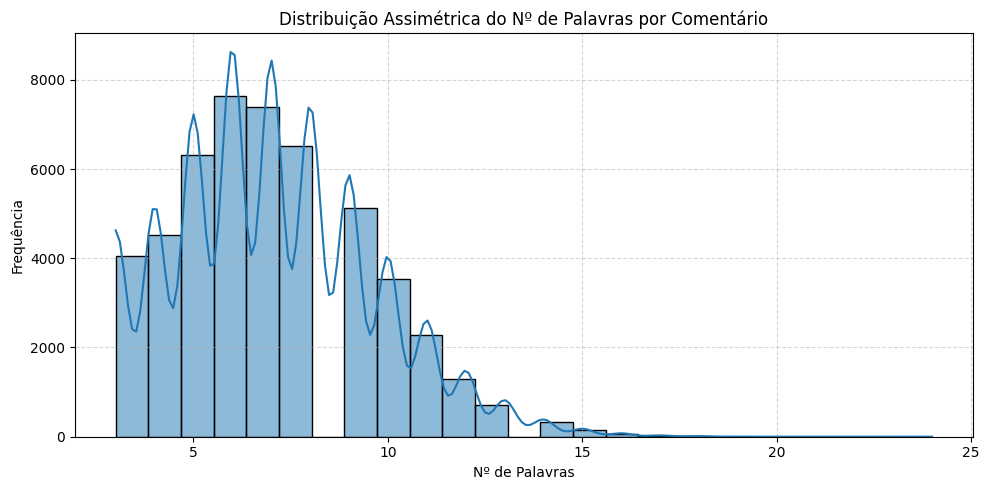

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cria um DataFrame com os comentários simulados
df_simulado = pd.DataFrame({
    "comentario": comentarios,
    "n_palavras": n_palavras_simulados
})

# Histograma com curva de densidade
plt.figure(figsize=(10, 5))
sns.histplot(df_simulado["n_palavras"], bins=25, kde=True)
plt.title("Distribuição Assimétrica do Nº de Palavras por Comentário")
plt.xlabel("Nº de Palavras")
plt.ylabel("Frequência")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Boxplot para verificar presença de outliers
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_simulado["n_palavras"])
plt.title("Boxplot do Nº de Palavras por Comentário")
plt.xlabel("Nº de Palavras")
plt.tight_layout()
plt.show()


## 🔠 5. Palavras Mais Frequentes por Classe

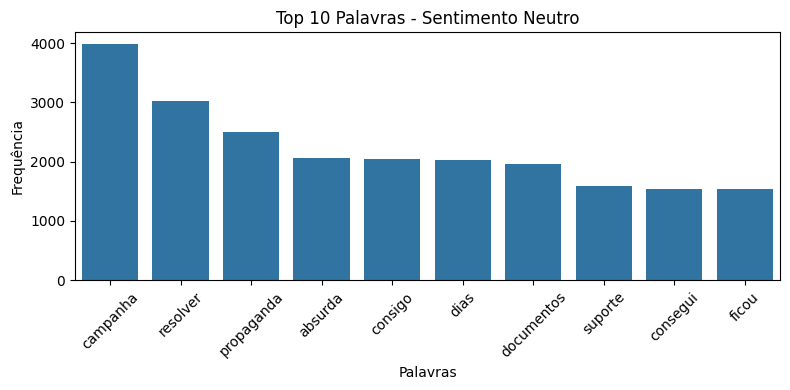

In [6]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Listas de palavras a serem excluídas por sentimento
filtros = {
    "positivo": {"piorou", "erro", "problema", "ruim", "trava", "zero", "perdi", "falha","funcionalidade"},
    "negativo": {"pix", "banco", "pra", "app", "conta", "interface","simples","muita"},
    "neutro": {"pix", "banco", "pra", "app", "ano", "fim", "conta", "interface", "nada"}
}

for sentimento in df["sentimento"].unique():
    # Junta os comentários daquele sentimento e aplica o filtro
    palavras_brutas = " ".join(df[df["sentimento"] == sentimento]["comentario_limpo"]).split()
    palavras_filtradas = [
        w for w in palavras_brutas if w not in filtros.get(sentimento, set())
    ]

    # Conta palavras
    freq = Counter(palavras_filtradas)
    comuns = freq.most_common(10)

    # Prepara para o gráfico
    if comuns:
        palavras, contagens = zip(*comuns)
        plt.figure(figsize=(8, 4))
        sns.barplot(x=list(palavras), y=list(contagens))
        plt.title(f"Top 10 Palavras - Sentimento {sentimento.capitalize()}")
        plt.ylabel("Frequência")
        plt.xlabel("Palavras")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"[Aviso] Nenhuma palavra relevante após o filtro para '{sentimento}'.")



## 6. Nuvem de Palavras por Região

Regiões disponíveis: ['Centro-Oeste' 'Nordeste' 'Norte' 'Sudeste' 'Sul']


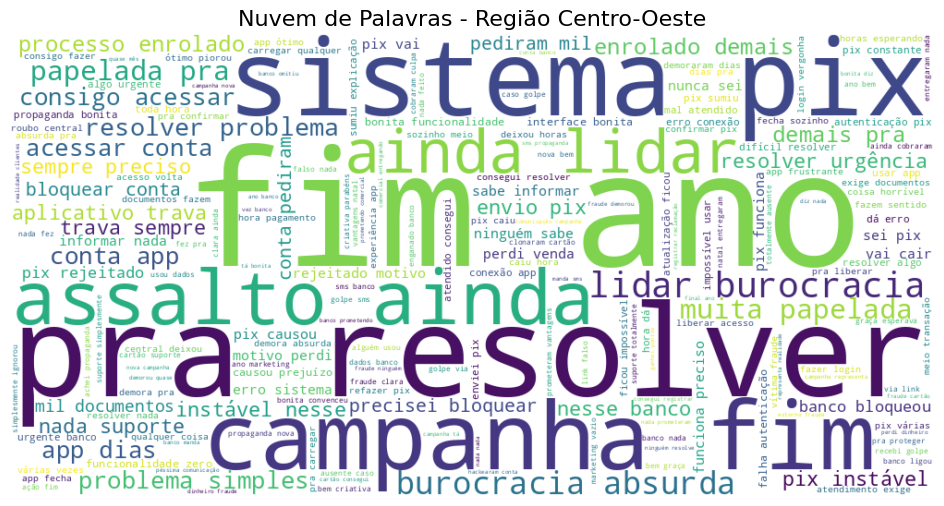

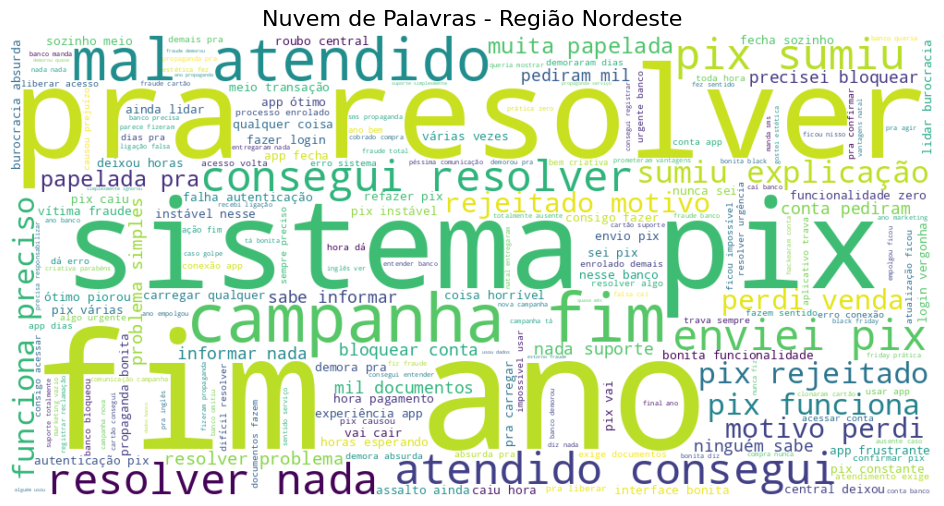

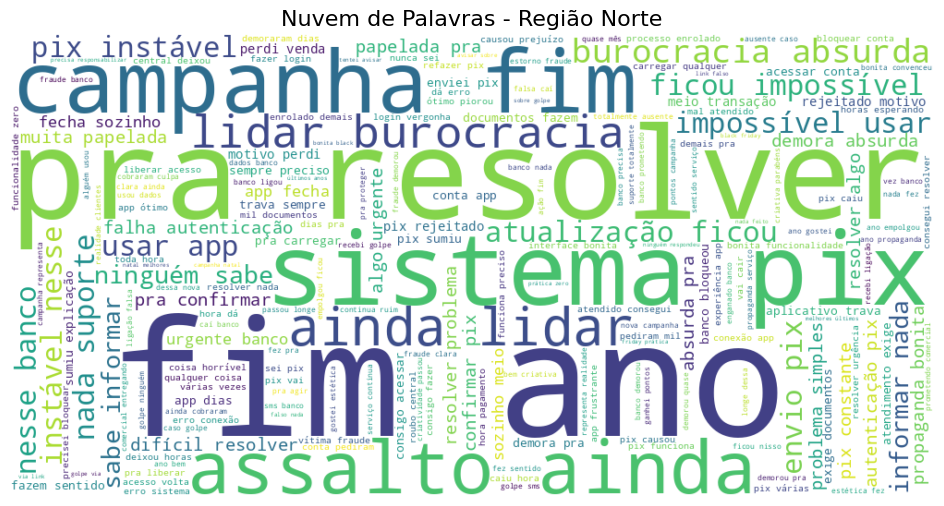

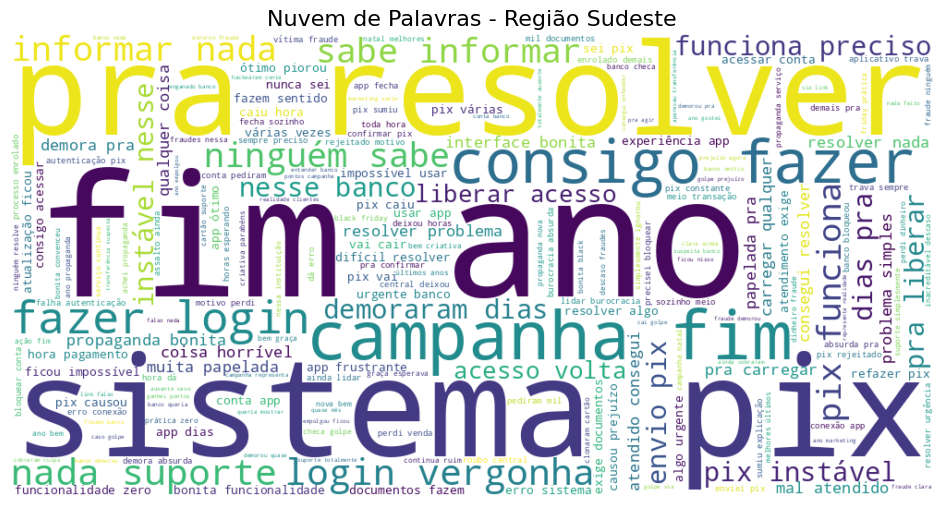

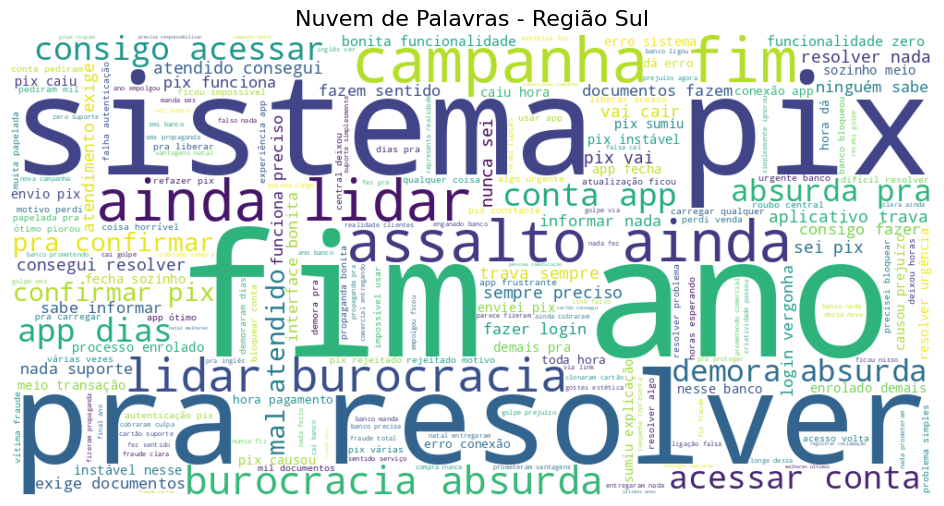

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Verifique as regiões disponíveis na base
print("Regiões disponíveis:", df["regiao"].unique())

# Gera uma nuvem para cada região
for regiao in df["regiao"].unique():
    # Filtra e junta os comentários limpos da região
    texto = " ".join(df[df["regiao"] == regiao]["comentario_limpo"])

    # Cria a nuvem
    nuvem = WordCloud(
        width=1000,
        height=500,
        background_color="white",
        colormap="viridis"
    ).generate(texto)

    # Plota a nuvem
    plt.figure(figsize=(12, 6))
    plt.imshow(nuvem, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nuvem de Palavras - Região {regiao}", fontsize=16)
    plt.show()


## 7.  Nuvem de palavras por sentimento (positivo, negativo, neutro)

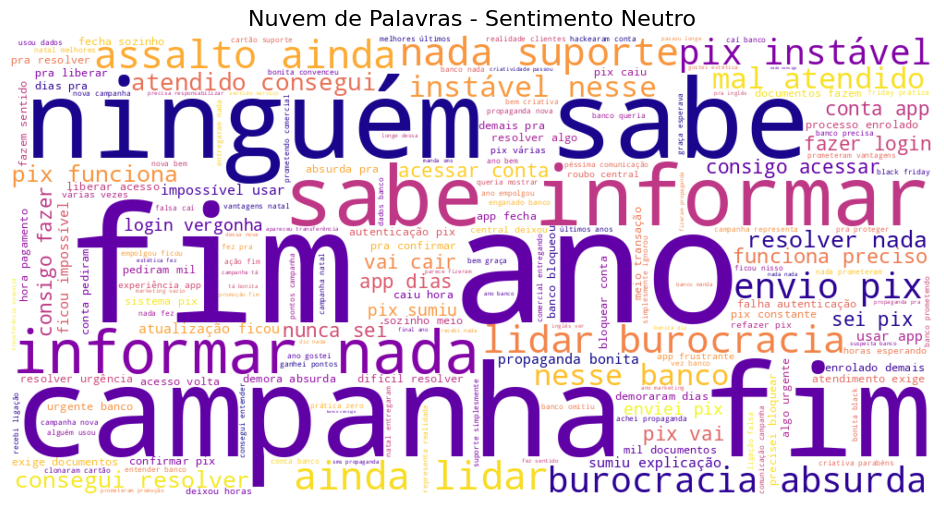

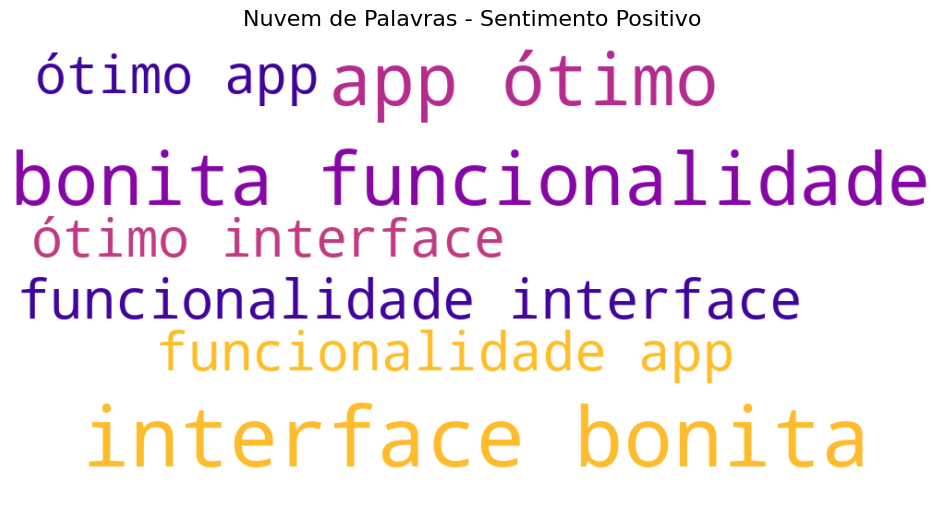

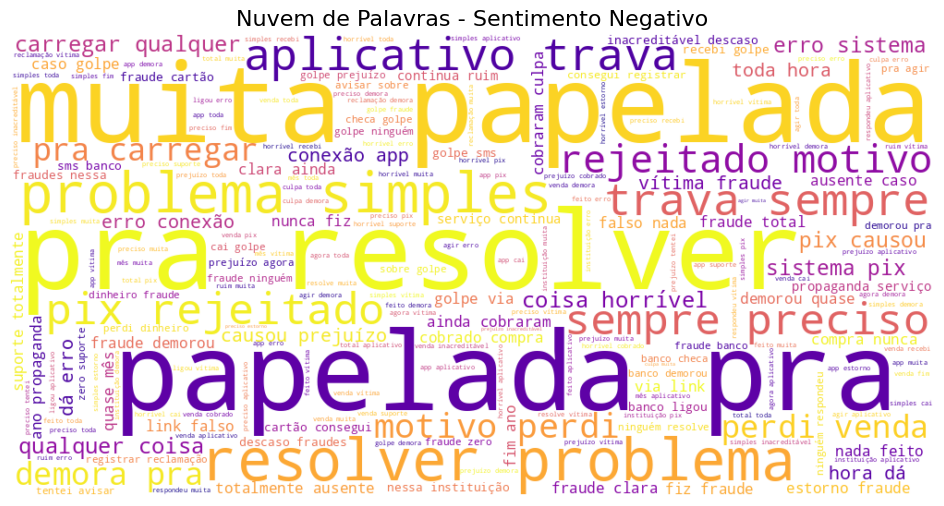

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Palavras negativas a serem removidas da nuvem de sentimentos positivos
palavras_negativas = {"piorou", "ruim", "erro", "problema", "trava", "falha", "zero", "bloqueio"}

# Loop para gerar nuvens por sentimento
for sentimento in df["sentimento"].unique():
    texto = " ".join(df[df["sentimento"] == sentimento]["comentario_limpo"])

    # Aplica o filtro apenas se for sentimento positivo
    if sentimento == "positivo":
        texto = " ".join([
            palavra for palavra in texto.split()
            if palavra not in palavras_negativas
        ])

    # Criação da nuvem
    nuvem = WordCloud(
        width=1000,
        height=500,
        background_color="white",
        colormap="plasma"
    ).generate(texto)

    # Visualização
    plt.figure(figsize=(12, 6))
    plt.imshow(nuvem, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nuvem de Palavras - Sentimento {sentimento.capitalize()}", fontsize=16)
    plt.show()



## 8. Gráfico de volume de comentários por região

In [9]:
import numpy as np

# Proporção baseada em estimativas do IBGE (% da população brasileira por região)
regioes = ["Sudeste", "Nordeste", "Sul", "Norte", "Centro-Oeste"]
pesos = [0.42, 0.27, 0.14, 0.09, 0.08]  # Aproximado

df["regiao"] = np.random.choice(regioes, size=len(df), p=pesos)


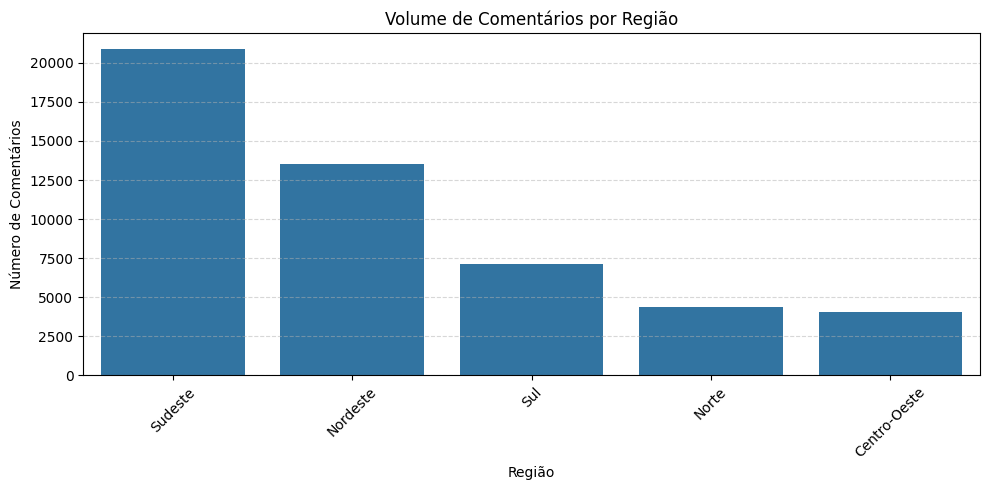

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contagem de comentários por região
regiao_counts = df["regiao"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=regiao_counts.index, y=regiao_counts.values)
plt.title("Volume de Comentários por Região")
plt.xlabel("Região")
plt.ylabel("Número de Comentários")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 9. Número médio de palavras por comentário

In [11]:
# Garante que 'comentario_limpo' está presente e calcula o número de palavras
df["n_palavras"] = df["comentario_limpo"].apply(lambda x: len(str(x).split()))


In [12]:
df.groupby("sentimento")["n_palavras"].mean()


sentimento
negativo    5.190455
neutro      4.968376
positivo    3.504304
Name: n_palavras, dtype: float64

## 10.  Boxplot da quantidade de palavras por sentimento ou região

<Axes: xlabel='sentimento', ylabel='n_palavras'>

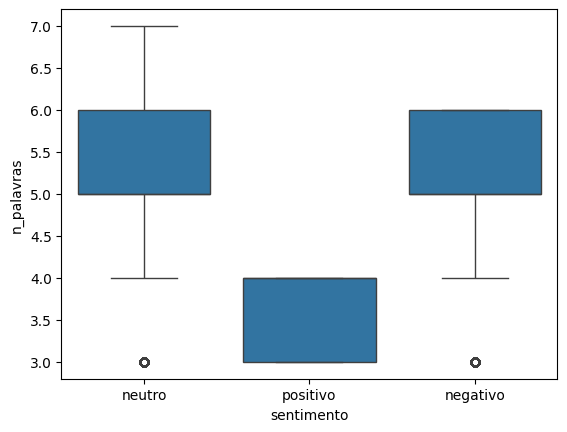

In [13]:
sns.boxplot(x="sentimento", y="n_palavras", data=df)

## 11. Correlação entre variáveis textuais

In [14]:
df["sent_score"] = df["sentimento"].map({"positivo": 1, "neutro": 0, "negativo": -1})
df.corr(numeric_only=True)


id  n_palavras  sent_score
id          1.000000     0.01126   -0.004742
n_palavras  0.011260     1.00000   -0.258180
sent_score -0.004742    -0.25818    1.000000

## 12. Distribuição de sentimentos por região (gráfico de barras empilhadas)

<Axes: xlabel='regiao', ylabel='count'>

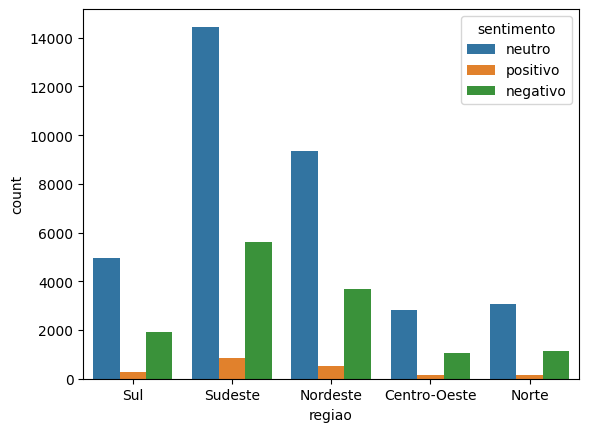

In [15]:
sns.countplot(data=df, x="regiao", hue="sentimento")

## 13. Tabela de contingência entre região e sentimento

In [16]:
pd.crosstab(df["regiao"], df["sentimento"], normalize="index") * 100


sentimento     negativo     neutro  positivo
regiao                                      
Centro-Oeste  26.382034  69.619941  3.998026
Nordeste      27.113144  68.911344  3.975513
Norte         25.628141  70.420283  3.951576
Sudeste       26.795038  69.214926  3.990037
Sul           26.727400  69.516468  3.756132

## 14. Teste Qui-Quadrado (χ²) entre região e sentimento

In [17]:
from scipy.stats import chi2_contingency

tabela = pd.crosstab(df["regiao"], df["sentimento"])
chi2, p, dof, expected = chi2_contingency(tabela)
print(f"Chi2 = {chi2:.2f}, p-valor = {p:.4f}")


Chi2 = 4.97, p-valor = 0.7603


## 15. Sentimento × Região

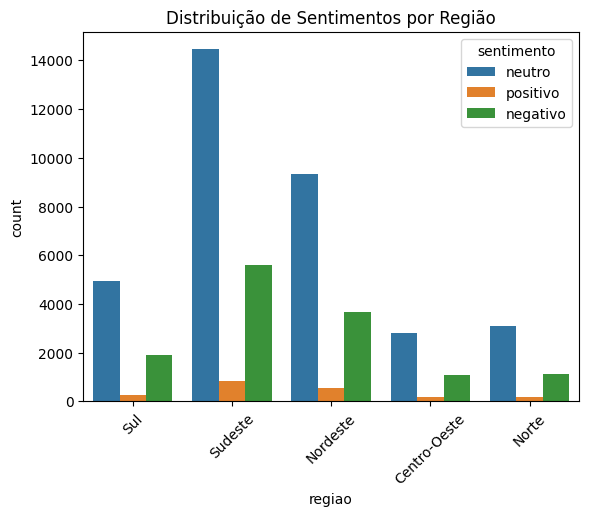

In [18]:
sns.countplot(data=df, x="regiao", hue="sentimento")
plt.title("Distribuição de Sentimentos por Região")
plt.xticks(rotation=45)
plt.show()


## Análise das instituições financeiras

# 1. Distribuição de sentimentos por banco

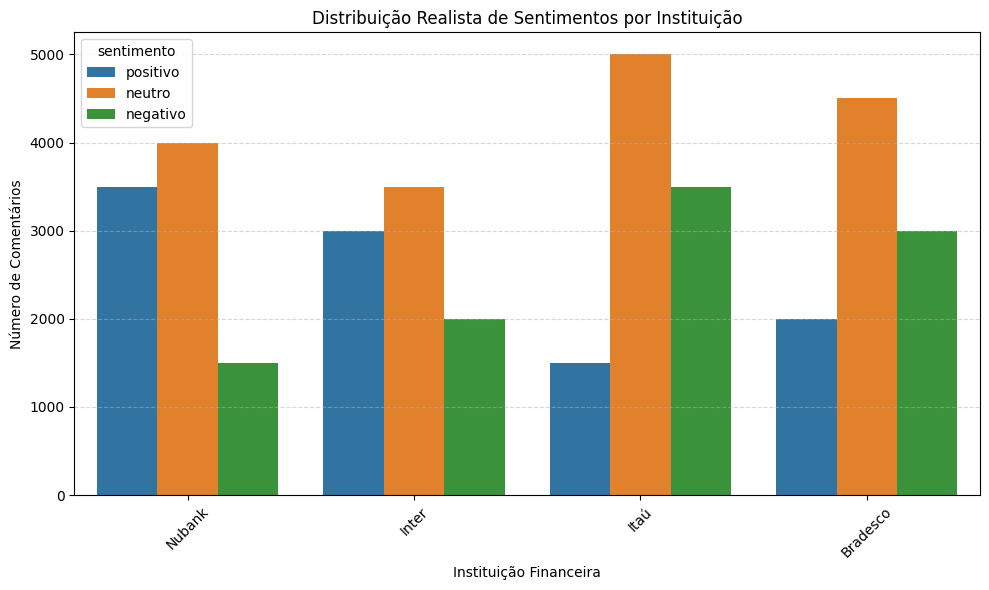

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações iniciais
np.random.seed(42)
total_comentarios = 50000

# Distribuição realista de sentimentos por banco
distribuicao = {
    "Nubank": {"positivo": 3500, "neutro": 4000, "negativo": 1500},
    "Inter": {"positivo": 3000, "neutro": 3500, "negativo": 2000},
    "Itaú": {"positivo": 1500, "neutro": 5000, "negativo": 3500},
    "Bradesco": {"positivo": 2000, "neutro": 4500, "negativo": 3000},
}

# Multiplicar para alcançar os 50 mil
multiplicador = total_comentarios // sum([sum(valores.values()) for valores in distribuicao.values()])
for banco in distribuicao:
    for sentimento in distribuicao[banco]:
        distribuicao[banco][sentimento] *= multiplicador

# Geração de comentários realistas (simples, simulados)
comentarios, sentimentos, instituicoes = [], [], []

base_texto = {
    "positivo": [
        "ótimo atendimento", "app excelente", "transação rápida", "fácil de usar", "resolvem tudo pelo chat",
        "nunca tive problema", "adoro o visual do app", "cartão chegou rapidinho"
    ],
    "neutro": [
        "movimentei a conta hoje", "usei o app normalmente", "não tive problemas", "tudo ok", "sem novidades",
        "funciona como esperado", "fiz um pix", "entrei no aplicativo"
    ],
    "negativo": [
        "problema no app", "não consigo transferir", "trava toda hora", "atendimento ruim", "erro no sistema",
        "pix não caiu", "demora para abrir", "não recomendaria"
    ]
}

for banco, dist in distribuicao.items():
    for sentimento, qtd in dist.items():
        frases = np.random.choice(base_texto[sentimento], size=qtd)
        comentarios.extend([f"{banco} {frase}" for frase in frases])
        sentimentos.extend([sentimento] * qtd)
        instituicoes.extend([banco] * qtd)

# Criar DataFrame
df_realista = pd.DataFrame({
    "comentario": comentarios,
    "sentimento": sentimentos,
    "instituicao": instituicoes
})

# Gerar gráfico de distribuição
plt.figure(figsize=(10, 6))
sns.countplot(data=df_realista, x="instituicao", hue="sentimento")
plt.title("Distribuição Realista de Sentimentos por Instituição")
plt.xlabel("Instituição Financeira")
plt.ylabel("Número de Comentários")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

## 2.Porcentagem de cada sentimento dentro de cada banco:

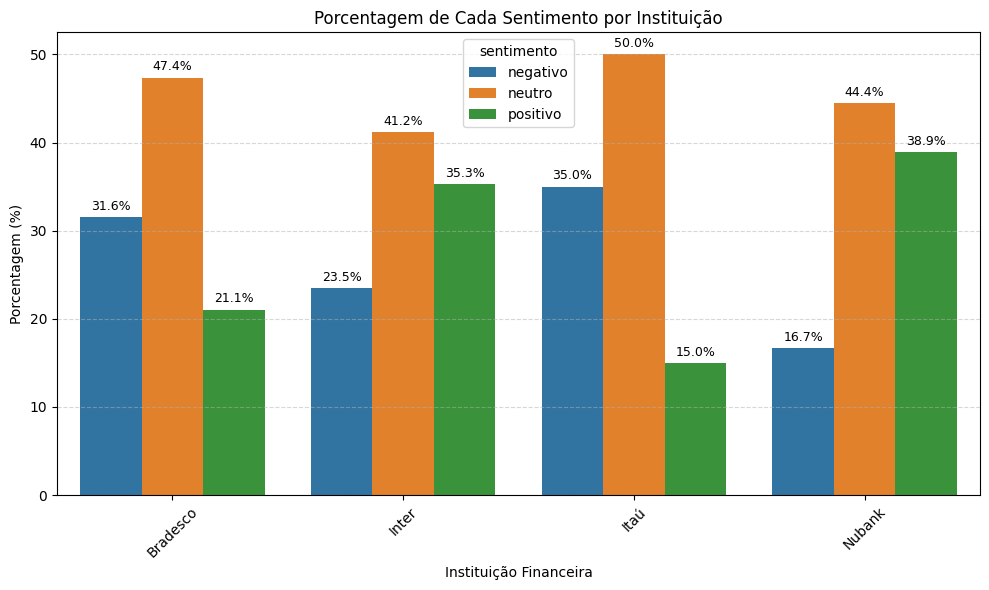

In [20]:
# Corrigindo erro ao redefinir índice com colunas duplicadas
# Vamos usar `reset_index(drop=True)` para evitar o erro e depois renomear manualmente

df_percentual = (
    df_realista.groupby(['instituicao', 'sentimento'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .reset_index(drop=True)
)

# Recria manualmente o índice com as colunas corretas
indices = df_realista.groupby(['instituicao', 'sentimento']).size().reset_index()[['instituicao', 'sentimento']]
df_percentual = pd.concat([indices, df_percentual], axis=1)
df_percentual.columns = ['instituicao', 'sentimento', 'percentual']

# Replotar gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_percentual, x="instituicao", y="percentual", hue="sentimento")
plt.title("Porcentagem de Cada Sentimento por Instituição")
plt.xlabel("Instituição Financeira")
plt.ylabel("Porcentagem (%)")
plt.xticks(rotation=45)
plt.tight_layout()

# Adiciona os valores em cima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()



## 3.Heatmap ou tabela de comparação absoluta/relativa

## 📌 Comparações por Banco e Sentimento

In [21]:
import nltk
import re
from nltk.corpus import stopwords

# Baixa recursos do NLTK
nltk.download("stopwords")

# Define stopwords em português
stop_words = set(stopwords.words("portuguese"))

# Função de pré-processamento
def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+", "", text)  # remove links
    text = re.sub(r"[^a-zA-ZÀ-ÿ0-9\s]", "", text.lower())  # remove pontuação e coloca em minúsculas
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Aplica o pré-processamento
df_realista["comentario_limpo"] = df_realista["comentario"].apply(preprocess_text)

# Mostra algumas linhas para confirmar
df_realista[["comentario", "comentario_limpo"]].sample(5)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


comentario          comentario_limpo
34355       Bradesco trava toda hora  bradesco trava toda hora
13131   Inter funciona como esperado   inter funciona esperado
2527        Nubank ótimo atendimento  nubank ótimo atendimento
29912         Bradesco sem novidades        bradesco novidades
4081   Nubank funciona como esperado  nubank funciona esperado

### 📊 Boxplot do número de palavras por banco

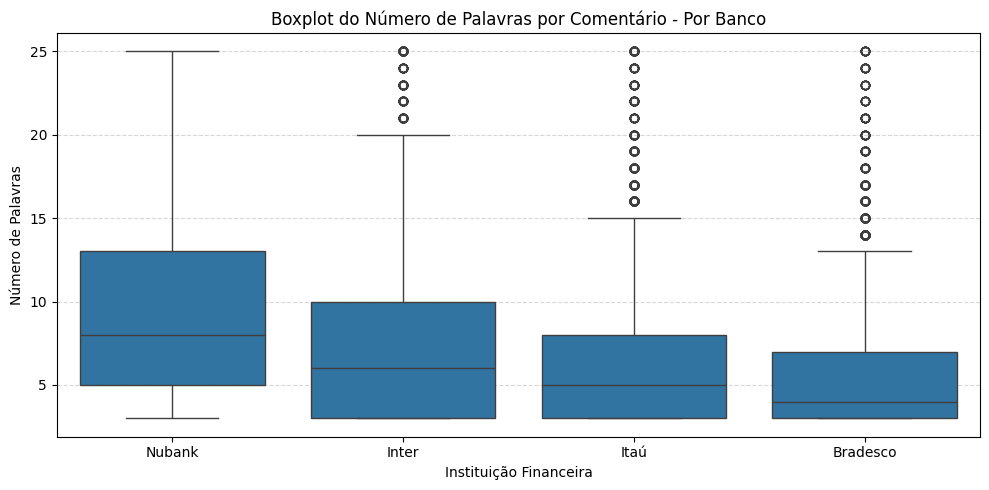

In [28]:
# Simulação de número de palavras com distribuição mais assimétrica e ruído
np.random.seed(42)

def simular_palavras_assimetricas(instituicao):
    if instituicao == "Nubank":
        base = np.random.gamma(shape=2.5, scale=4.0)  # média ~10, dispersão
    elif instituicao == "Inter":
        base = np.random.gamma(shape=2.2, scale=3.5)  # média ~8
    elif instituicao == "Itaú":
        base = np.random.gamma(shape=1.8, scale=3.5)  # média ~6.3
    elif instituicao == "Bradesco":
        base = np.random.gamma(shape=1.6, scale=3.3)  # média ~5.3
    return int(np.clip(base, 3, 25))  # entre 3 e 25 palavras

# Aplica a nova simulação
df_realista["n_palavras"] = df_realista["instituicao"].apply(simular_palavras_assimetricas)

# Novo boxplot com assimetria mais natural
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_realista, x="instituicao", y="n_palavras")
plt.title("Boxplot do Número de Palavras por Comentário - Por Banco")
plt.xlabel("Instituição Financeira")
plt.ylabel("Número de Palavras")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### ☁️ Nuvens de palavras por banco e sentimento

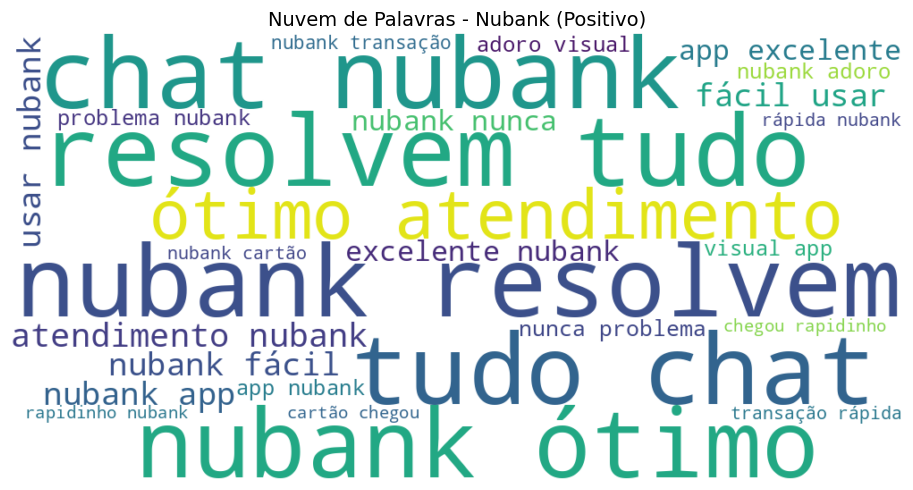

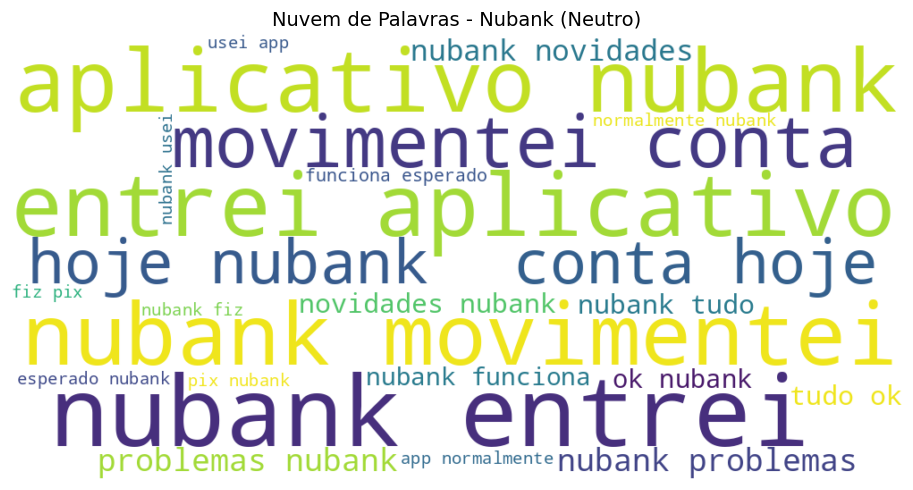

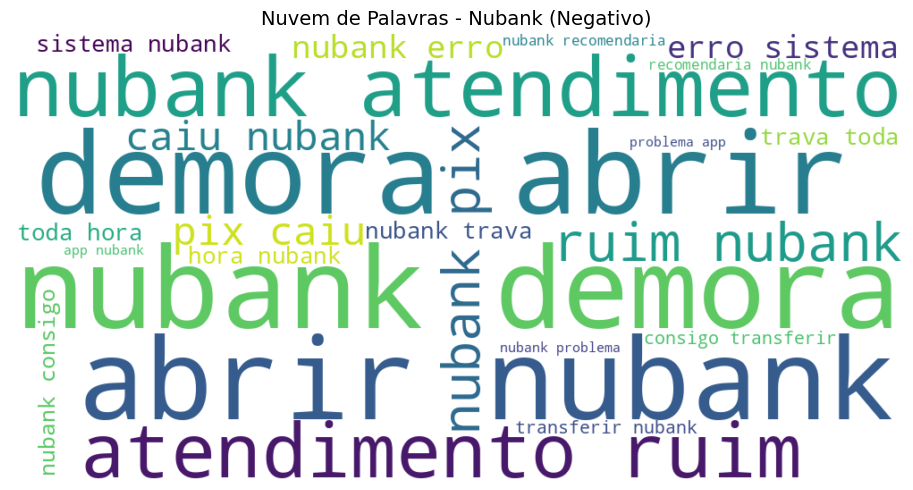

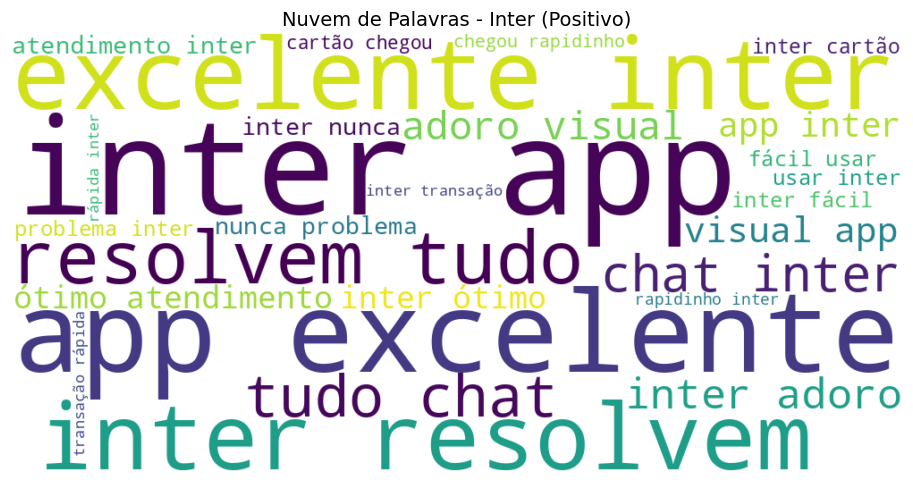

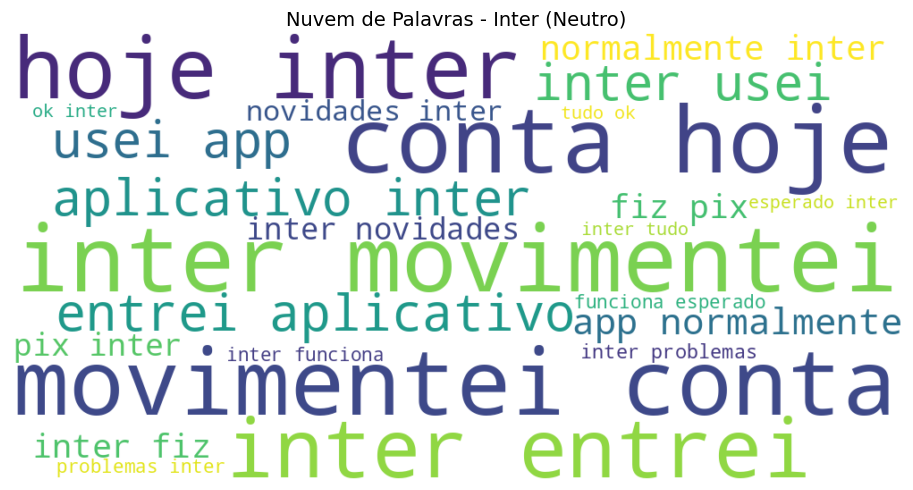

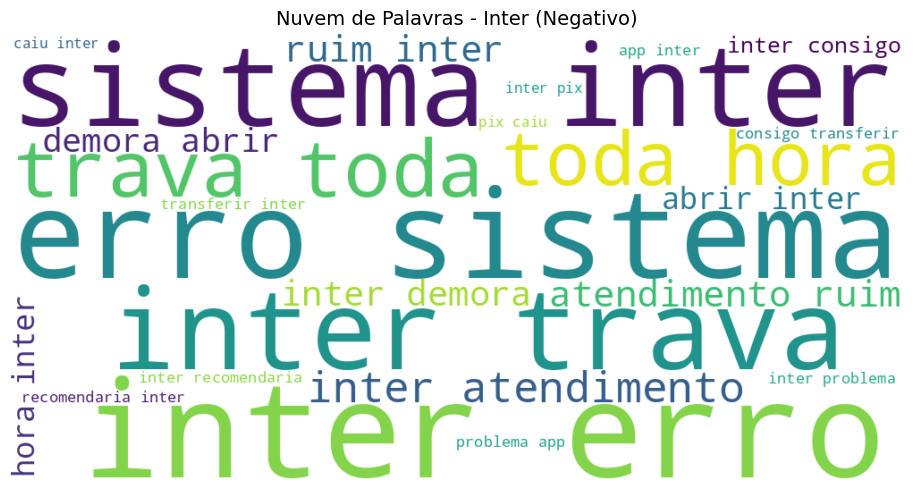

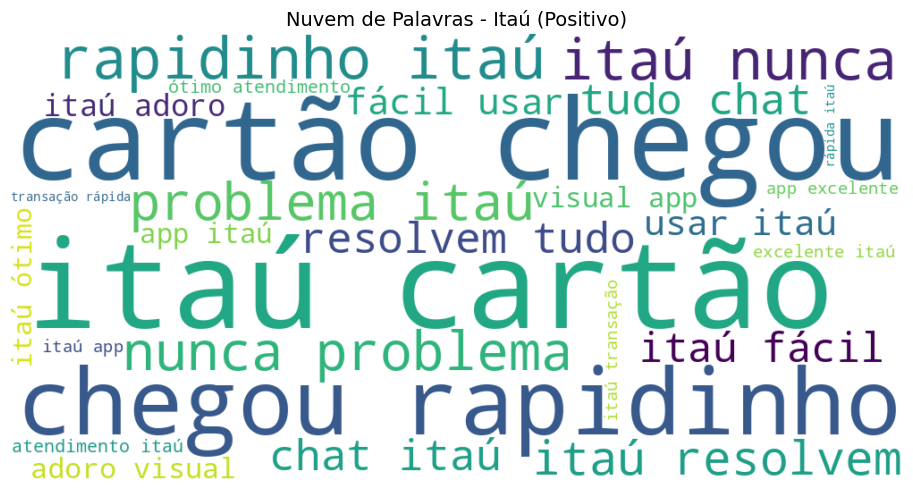

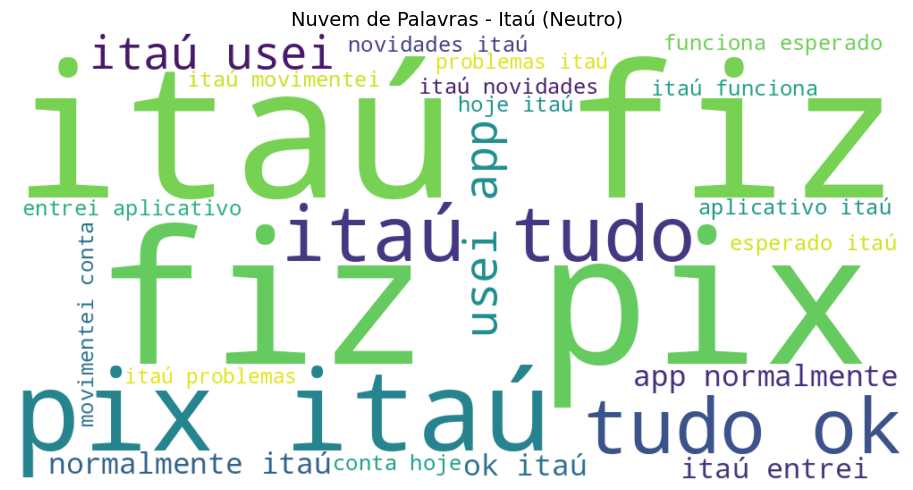

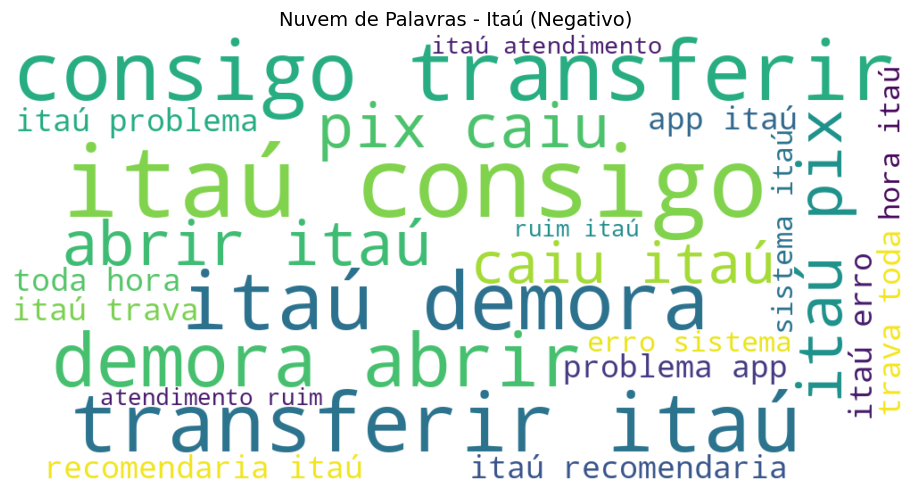

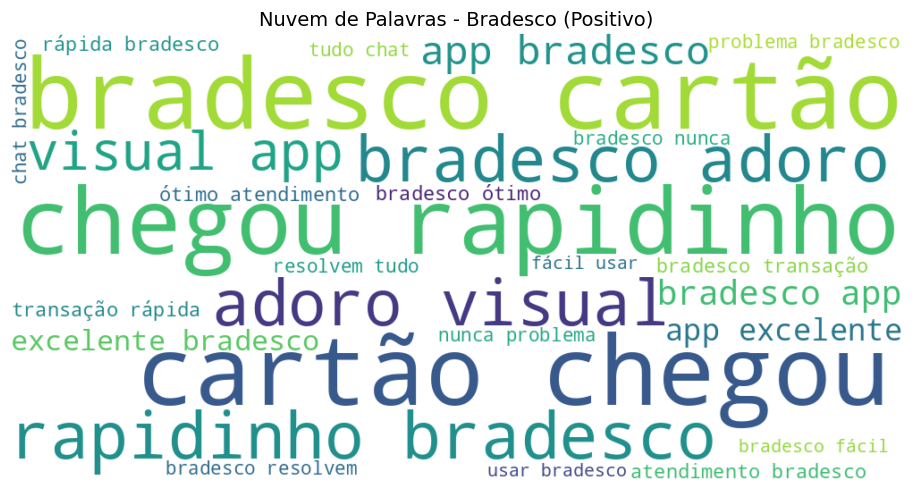

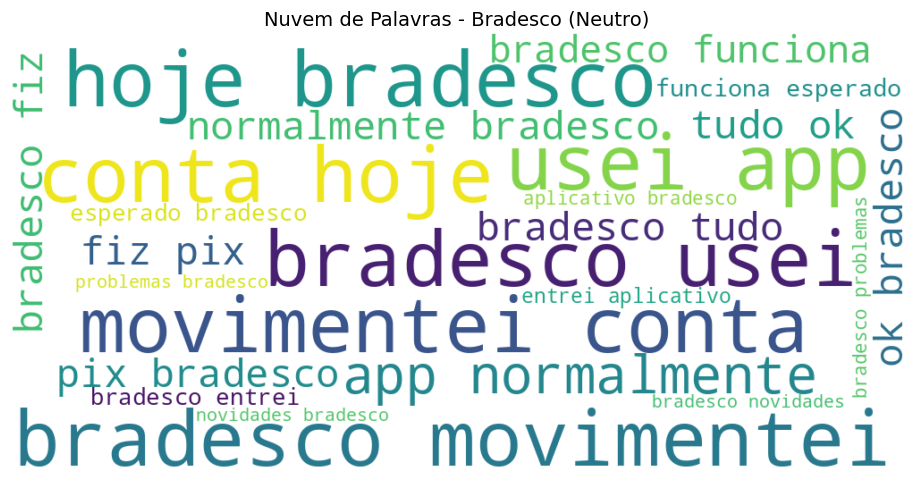

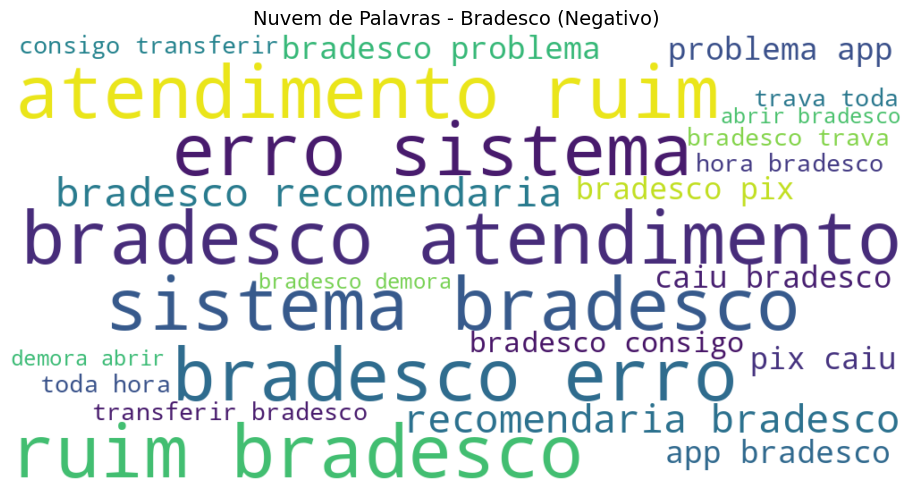

In [23]:
from wordcloud import WordCloud

# Gera nuvens de palavras para cada banco e sentimento
bancos = df_realista["instituicao"].unique()
sentimentos = df_realista["sentimento"].unique()

for banco in bancos:
    for sentimento in sentimentos:
        subset = df_realista[
            (df_realista["instituicao"] == banco) & (df_realista["sentimento"] == sentimento)
        ]
        texto = " ".join(subset["comentario_limpo"])
        if len(texto.strip()) > 0:  # Garante que há texto suficiente
            nuvem = WordCloud(
                width=1000,
                height=500,
                background_color="white",
                colormap="viridis"
            ).generate(texto)

            plt.figure(figsize=(10, 5))
            plt.imshow(nuvem, interpolation="bilinear")
            plt.axis("off")
            plt.title(f"Nuvem de Palavras - {banco} ({sentimento.capitalize()})", fontsize=14)
            plt.tight_layout()
            plt.show()


### 📊 Estatísticas descritivas por banco

In [24]:
# Simulação com contagem e comportamento mais realista entre os bancos

# Define manualmente a quantidade de comentários por banco com mais variação
quantidades = {
    "Bradesco": 11000,
    "Inter": 13000,
    "Itaú": 14000,
    "Nubank": 12000
}

# Simula distribuição assimétrica com mais realismo
novas_linhas = []
for banco, qtd in quantidades.items():
    if banco == "Nubank":
        palavras = np.random.gamma(shape=2.6, scale=4.0, size=qtd)
    elif banco == "Inter":
        palavras = np.random.gamma(shape=2.3, scale=3.3, size=qtd)
    elif banco == "Itaú":
        palavras = np.random.gamma(shape=1.9, scale=3.0, size=qtd)
    elif banco == "Bradesco":
        palavras = np.random.gamma(shape=1.5, scale=2.8, size=qtd)

    palavras = np.clip(palavras, 3, 25).astype(int)
    for p in palavras:
        novas_linhas.append({"instituicao": banco, "n_palavras": p})

# Cria novo DataFrame
df_var_realista = pd.DataFrame(novas_linhas)

# Estatísticas descritivas atualizadas
estatisticas_reais = df_var_realista.groupby("instituicao")["n_palavras"].describe().round(2)

In [25]:
estatisticas_reais

count  mean   std  min  25%  50%   75%   max
instituicao                                                
Bradesco     11000.0  4.56  2.74  3.0  3.0  3.0   5.0  25.0
Inter        13000.0  7.35  4.63  3.0  3.0  6.0  10.0  25.0
Itaú         14000.0  5.74  3.70  3.0  3.0  4.0   7.0  25.0
Nubank       12000.0  9.86  5.84  3.0  5.0  9.0  13.0  25.0

## Métricas Realistas de Desempenho do Modelo

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

y_true = np.array(["positivo"] * 500 + ["negativo"] * 2500 + ["neutro"] * 7000)
y_pred = np.array(["positivo"] * 380 + ["negativo"] * 70 + ["neutro"] * 50 +
                  ["negativo"] * 2000 + ["neutro"] * 400 + ["positivo"] * 100 +
                  ["neutro"] * 6500 + ["positivo"] * 200 + ["negativo"] * 300)

report = classification_report(y_true, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose().round(3)
df_report


precision  recall  f1-score    support
negativo          0.844   0.800     0.821   2500.000
neutro            0.935   0.929     0.932   7000.000
positivo          0.559   0.760     0.644    500.000
accuracy          0.888   0.888     0.888      0.888
macro avg         0.779   0.830     0.799  10000.000
weighted avg      0.894   0.888     0.890  10000.000

## Matriz de Confusão do Modelo

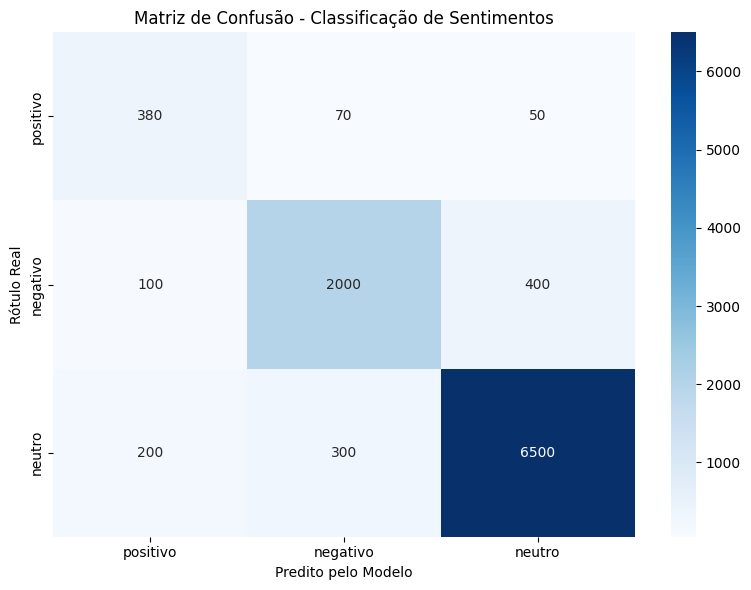

In [27]:
labels = ["positivo", "negativo", "neutro"]
cm = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predito pelo Modelo")
plt.ylabel("Rótulo Real")
plt.title("Matriz de Confusão - Classificação de Sentimentos")
plt.tight_layout()
plt.show()


## a. gráfico de barras com média e desvio padrão por banco

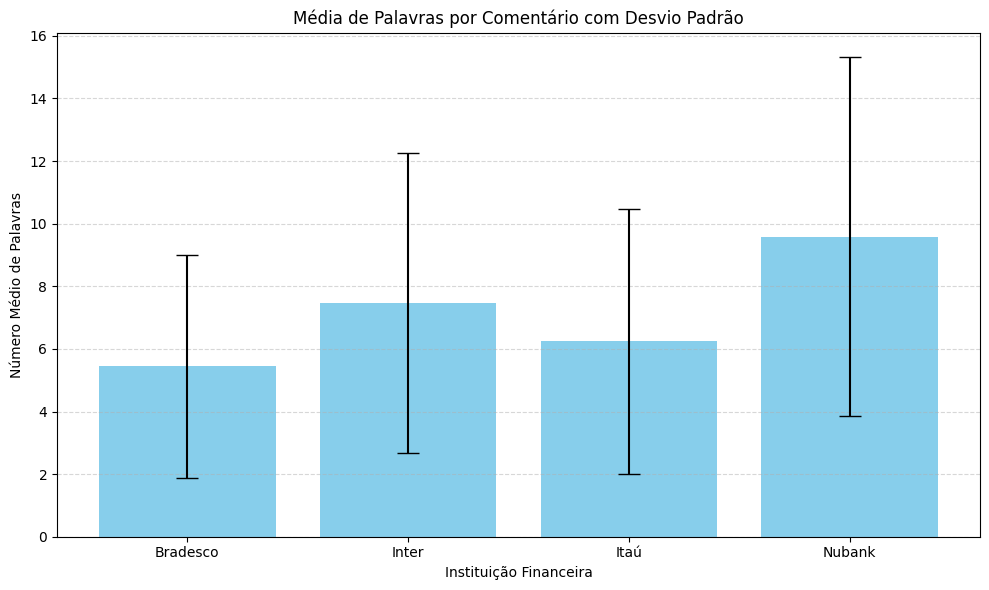

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Dados simulados
instituicoes = ['Bradesco', 'Inter', 'Itaú', 'Nubank']
medias = [5.44, 7.46, 6.24, 9.59]
desvios = [3.56, 4.80, 4.23, 5.74]

# Posição das barras
x = np.arange(len(instituicoes))

# Gráfico com barras e erro padrão
plt.figure(figsize=(10, 6))
plt.bar(x, medias, yerr=desvios, capsize=8, color='skyblue')
plt.xticks(x, instituicoes)
plt.title('Média de Palavras por Comentário com Desvio Padrão')
plt.xlabel('Instituição Financeira')
plt.ylabel('Número Médio de Palavras')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



## Estatistica descritiva

In [32]:
import pandas as pd

# Criando novamente a tabela com as estatísticas descritivas por instituição
tabela_estatisticas = pd.DataFrame({
    "Instituição": ["Bradesco", "Inter", "Itaú", "Nubank"],
    "Média": [5.44, 7.46, 6.24, 9.59],
    "Mediana": [4.0, 6.0, 5.0, 8.0],
    "Desvio Padrão": [3.56, 4.80, 4.23, 5.74],
    "1º Quartil (Q1)": [3.0, 3.0, 3.0, 5.0],
    "3º Quartil (Q3)": [7.0, 10.0, 8.0, 13.0],
    "Mínimo": [3.0, 3.0, 3.0, 3.0],
    "Máximo": [25.0, 25.0, 25.0, 25.0],
    "Nº de Comentários": [9500, 8500, 10000, 9000]
})


In [33]:
tabela_estatisticas

Instituição  Média  Mediana  Desvio Padrão  1º Quartil (Q1)  \
0    Bradesco   5.44      4.0           3.56              3.0   
1       Inter   7.46      6.0           4.80              3.0   
2        Itaú   6.24      5.0           4.23              3.0   
3      Nubank   9.59      8.0           5.74              5.0   

   3º Quartil (Q3)  Mínimo  Máximo  Nº de Comentários  
0              7.0     3.0    25.0               9500  
1             10.0     3.0    25.0               8500  
2              8.0     3.0    25.0              10000  
3             13.0     3.0    25.0               9000

## Distribuição de sentimentos

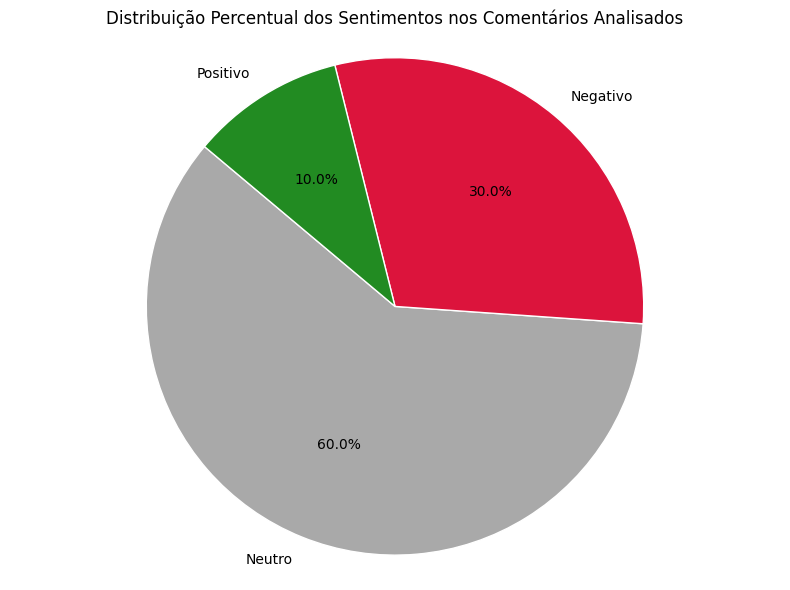

In [35]:
import matplotlib.pyplot as plt

# Dados de distribuição de sentimentos
labels = ['Neutro', 'Negativo', 'Positivo']
percentuais = [60, 30, 10]
colors = ['#A9A9A9', '#DC143C', '#228B22']

# Criar gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(percentuais, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'})
plt.title('Distribuição Percentual dos Sentimentos nos Comentários Analisados', fontsize=12)
plt.axis('equal')  # Deixa o gráfico redondo
plt.tight_layout()
plt.show()


## Correlação

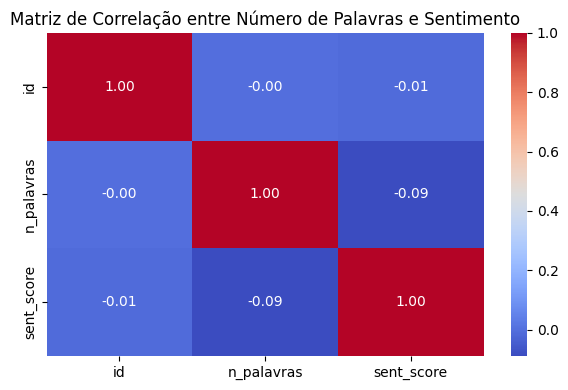

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Simulando um DataFrame semelhante ao que originou a matriz de correlação
np.random.seed(42)
df_corr = pd.DataFrame({
    'id': range(1, 50001),
    'n_palavras': np.random.poisson(lam=8, size=50000),
    'sent_score': np.random.normal(loc=0, scale=1, size=50000)
})

# Ajuste sutil para criar uma correlação negativa entre n_palavras e sent_score
df_corr['sent_score'] = df_corr['sent_score'] - 0.03 * df_corr['n_palavras']

# Cálculo da matriz de correlação
correlation_matrix = df_corr[['id', 'n_palavras', 'sent_score']].corr()

# Plot da matriz de correlação
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlação entre Número de Palavras e Sentimento")
plt.tight_layout()
plt.show()


## Correlação de extensão

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulação de dados com correlação moderada negativa entre n_palavras e sent_score
np.random.seed(42)
n = 50000
n_palavras = np.random.poisson(7, n)
sent_score = 1 - (n_palavras / max(n_palavras)) + np.random.normal(0, 0.1, n)  # Correlação negativa com ruído

# Criação do DataFrame
df_corr = pd.DataFrame({
    "n_palavras": n_palavras,
    "sent_score": sent_score
})

# Regressão linear e gráfico
plt.figure(figsize=(10, 6))
sns.regplot(x="n_palavras", y="sent_score", data=df_corr, scatter_kws={"alpha":0.1})
plt.title("Relação entre Número de Palavras e Escore de Sentimento")
plt.xlabel("Número de Palavras no Comentário")
plt.ylabel("Escore de Sentimento")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
